In [125]:
import math
import random
import matplotlib.pyplot as plt


def bike_distance_dist(weight_per_km, min_km, max_km):
    return {"weight": weight_per_km * (max_km - min_km), 
            "min": min_km,
            "max": max_km,
            "applies?": lambda x : min_km <= x < max_km 
           }

# This is all hard-coded and could be noodled around with
# CAREFUL!! Make sure the min-max are a ladder-like progression upward.
ratios = {"500m-1km":   bike_distance_dist(1, .5, 1),
          "1km-2km":    bike_distance_dist(10, 1, 2),
          "2km-3km":    bike_distance_dist(40, 2, 3),
          "3km-5km":    bike_distance_dist(30, 3, 5),
          "5km-10km":   bike_distance_dist(20, 5, 10),
          "10km-20km":  bike_distance_dist(10, 10, 20),
          "20km-40km":  bike_distance_dist(5, 20, 40),
          "40km-200km": bike_distance_dist(.1, 40, 200)}

weight_sum = sum(val["weight"] for val in ratios.values())
for ratio in ratios.values():
    ratio["percentage"] = ratio["weight"] / weight_sum

## Generate histogram to represent probability distribution (for validation only)

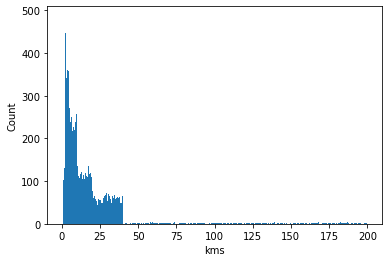

In [126]:
def generate_validation_histogram():
    hist_data = []
    total_count = 10000

    for ratio in ratios:
        num_in_range = math.floor(ratios[ratio]["percentage"] * total_count)
        for _ in range(num_in_range):
            hist_data.append(random.uniform(ratios[ratio]["min"], ratios[ratio]["max"]))

    plt.hist(hist_data, bins=400) 
    plt.ylabel('Count')
    plt.xlabel('kms');
        
generate_validation_histogram()

In [127]:
def bin_by_kms(kms):
    return next((k for k, v in ratios.items() if v["applies?"](kms)), None)

In [128]:
bin_by_kms(33.1)

'20km-40km'

## Get count per bin for a given sample size

In [129]:
def bike_trip_count(num):
    """For a sample size of num, show how many within distribution should be returned.
       Because it round
    """
    return {k:round(v["percentage"] * num) for k,v in ratios.items()}
    

In [130]:
bike_trip_count(1000)

{'500m-1km': 1,
 '1km-2km': 23,
 '2km-3km': 94,
 '3km-5km': 141,
 '5km-10km': 234,
 '10km-20km': 234,
 '20km-40km': 234,
 '40km-200km': 38}